In [1]:
import json
import random
import urllib.request

HOST = 'odoo'
PORT = 8069
DB = 'fncv'
USER = 'admin'
PASS = '1234'

def json_rpc(url, method, params):
    data = {
        "jsonrpc": "2.0",
        "method": method,
        "params": params,
        "id": random.randint(0, 1000000000),
    }
    print(json.dumps(data).encode())
    req = urllib.request.Request(url=url, data=json.dumps(data).encode(), headers={
        "Content-Type":"application/json",
    })
    reply = json.loads(urllib.request.urlopen(req).read().decode('UTF-8'))
    if reply.get("error"):
        raise Exception(reply["error"])
    return reply["result"]

def call(url, service, method, *args):
    return json_rpc(url, "call", {"service": service, "method": method, "args": args})

# log in the given database
url = "http://%s:%s/jsonrpc" % (HOST, PORT)
uid = call(url, "common", "login", DB, USER, PASS)

# create a new note
args = []

tests = call(url, "object", "execute", DB, uid, PASS, 'natacion.club', 'search_read', [],['club_json'])
print(tests)



b'{"jsonrpc": "2.0", "method": "call", "params": {"service": "common", "method": "login", "args": ["fncv", "admin", "1234"]}, "id": 383503006}'
b'{"jsonrpc": "2.0", "method": "call", "params": {"service": "object", "method": "execute", "args": ["fncv", 2, "1234", "natacion.club", "search_read", [], ["club_json"]]}, "id": 874949037}'
[{'id': 222, 'club_json': '{"club": "TORNADO SWIM CLUB", "points": 179}'}, {'id': 223, 'club_json': '{"club": "OLIMPIC WAVES", "points": 0}'}, {'id': 224, 'club_json': '{"club": "NEPTUNO TEAM", "points": 0}'}, {'id': 225, 'club_json': '{"club": "TORPEDO AQUA", "points": 53}'}, {'id': 226, 'club_json': '{"club": "TRITON SWIMMERS", "points": 113506}'}, {'id': 227, 'club_json': '{"club": "AQUA FORCE", "points": 15814}'}, {'id': 228, 'club_json': '{"club": "RAPID STREAM", "points": 0}'}, {'id': 229, 'club_json': '{"club": "BLUE CURRENT", "points": 130924}'}, {'id': 230, 'club_json': '{"club": "SPLASH TEAM", "points": 0}'}, {'id': 231, 'club_json': '{"club": "MA

In [2]:
!pip install matplotlib


In [3]:
import matplotlib.pyplot as plt

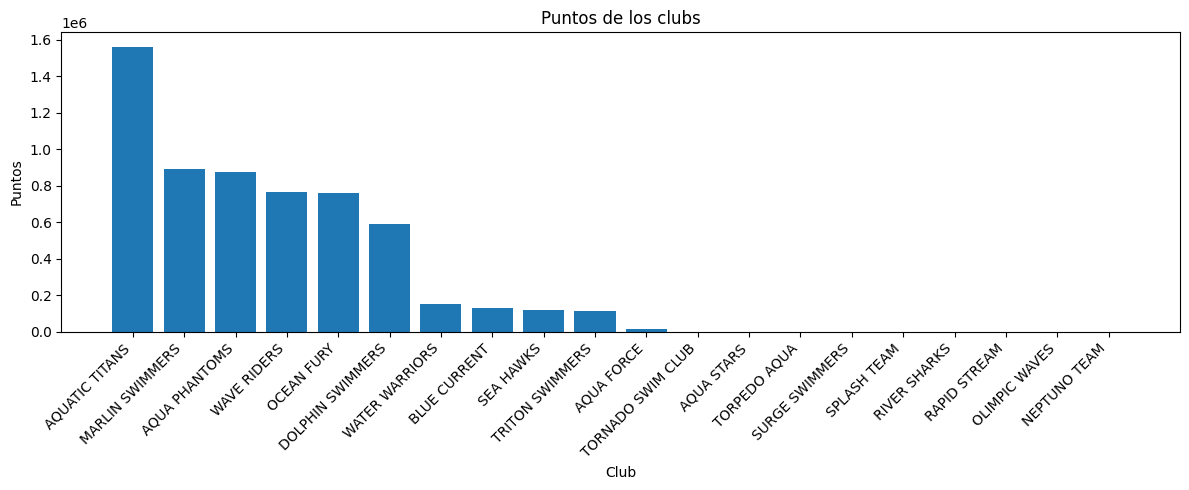

In [4]:
# Extraer nombres de clubs y puntos desde la lista 'tests'
club_names = [json.loads(rec['club_json'])['club'] for rec in tests]
points = [json.loads(rec['club_json'])['points'] for rec in tests]

sorted_pairs = sorted(zip(points, club_names), reverse=True)
sorted_points, sorted_clubs = zip(*sorted_pairs)

# Graficar
plt.figure(figsize=(12,5))
plt.bar(sorted_clubs, sorted_points)
plt.title('Puntos de los clubs')
plt.xlabel('Club')
plt.ylabel('Puntos')
plt.xticks(rotation=45, ha='right')  # para que se vean los nombres
plt.tight_layout()
plt.show()